In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 1.讀入Fashion MNIST數據集

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### 2.欣賞數據集內容

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [8]:
print(len(x_train))
print(len(x_test)) #分別查看訓練資料、測試資料長度(筆數)

60000
10000


In [9]:
n = 5000

圖片顯示的是： Coat


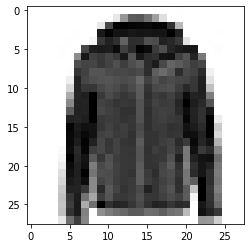

In [10]:
print('圖片顯示的是：', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys')

### 3.資料整理

In [11]:
x_train = x_train.reshape(60000, 784)/255 #矩陣拉平+標準化

In [12]:
x_test = x_test.reshape(10000, 784)/255

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_train = to_categorical(y_train, 10)

In [15]:
y_test = to_categorical(y_test, 10)

In [17]:
y_train[5000]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

### 4.打造神經網路

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [34]:
learn = Sequential()

In [35]:
learn.add(Dense(150, input_dim=784, activation='relu'))

In [36]:
learn.add(Dense(150, activation='relu'))

In [37]:
learn.add(Dense(150, activation='relu'))

In [38]:
learn.add(Dense(150, activation='relu'))

In [39]:
learn.add(Dense(10, activation='softmax'))

### 5.組裝神經網路

In [40]:
learn.compile(loss='mse', optimizer=SGD(lr=0.66), metrics=['accuracy'])

In [41]:
learn.summary() 
#Param由784維輸入*150個神經元+各個神經元的偏值組成
#784*150+150=117750

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_9 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_10 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_11 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1510      
Total params: 187,210
Trainable params: 187,210
Non-trainable params: 0
_________________________________________________________________


### 6.訓練

In [42]:
learn.fit(x_train, y_train, batch_size=80, epochs=25)

Epoch 1/25
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0407 - acc: 0.7027
Epoch 2/25
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0246 - acc: 0.8300
Epoch 3/25
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0218 - acc: 0.8490
Epoch 4/25
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0201 - acc: 0.8614
Epoch 5/25
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0189 - acc: 0.8695
Epoch 6/25
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0180 - acc: 0.8764
Epoch 7/25
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0174 - acc: 0.8804
Epoch 8/25
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0169 - acc: 0.8848
Epoch 9/25
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0162 - acc: 0.8902
Epoch 10/25
60000/60000 [==============================] - 4s 64us/sample - loss: 

### 7.檢視訓練成果

In [47]:
result = learn.predict_classes(x_test)

神經網路Learn所預測的是： Trouser


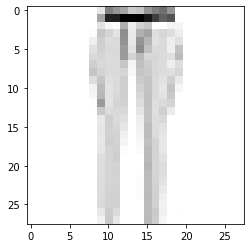

In [49]:
n = 6000
print('神經網路Learn所預測的是：', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')

### *修改、調整項目：
1. 神經網路變數名稱 (model→learn)
2. 增加隱藏層層數
3. 增加神經元數
4. 調整Learning Rate
5. 降低batch_size, 增加訓練次數(epochs)